In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Problem 3

Load and read in data for each dataset.

In [5]:
one='/home/idies/workspace/AS.171.205/data/noise_01.csv'
two='/home/idies/workspace/AS.171.205/data/noise_02.csv'
three='/home/idies/workspace/AS.171.205/data/noise_03.csv'
four='/home/idies/workspace/AS.171.205/data/noise_04.csv'
five='/home/idies/workspace/AS.171.205/data/noise_05.csv'
ten='/home/idies/workspace/AS.171.205/data/noise_10.csv'
df1=pd.read_csv(one,header = None)
df2=pd.read_csv(two,header = None)
df3=pd.read_csv(three,header = None)
df4=pd.read_csv(four,header = None)
df5=pd.read_csv(five,header = None)
df10=pd.read_csv(ten,header = None)

Store the means and variances of the datasets in two vectors.

In [50]:
mean1=df1[0].mean()
mean2=df2[0].mean()
mean3=df3[0].mean()
mean4=df4[0].mean()
mean5=df5[0].mean()
mean10=df10[0].mean()
var1=df1[0].var()
var2=df2[0].var()
var3=df3[0].var()
var4=df4[0].var()
var5=df5[0].var()
var10=df10[0].var()
means=[mean1,mean2,mean3,mean4,mean5,mean10]
var=[var1,var2,var3,var4,var5,var10]

Note: I used N' and I' for the means of photons and intensity.
If it were the case that the noise is due to the Poisson distribution of discrete photons, then N', the average number of photons, would equal (O_N)^2, the variance of the photons. However, we are not given the number of photons. Rather, we are given the intensity. We do know, though, that I = a*N, where I is intensity and N is number of photons, so we get I' = a * N'. But we also get, from explicitly writing out what variance of I and variance of N, that (O_I)^2 = a^2 * (O_N)^2. From above, if the noise is due to Poisson distribution of photons, then N' = (O_N)^2, so plugging in for N', we get I' = a * (O_N)^2 and (O_I)^2 = a^2 * (O_N)^2. Dividing, we get that (O_I)^2 / I' = a. From the code above, we can check that each voltage will produce an "a" that is very close.

In [52]:
a1 = var1 / mean1
a2 = var2 / mean2
a3 = var3 / mean3
a4 = var4 / mean4
a5 = var5 / mean5
a10 = var10 / mean10

In [53]:
print(a1)
print(a2)
print(a3)
print(a4)
print(a5)
print(a10)

0.007811273810489912
0.008616888845957212
0.00942642753292682
0.008997968160171527
0.008921665676350752
0.005540958605731412


The a's seem relatively close, though the a's corresponding to voltage of 1.0 and voltage 0.1 are a bit farther from the others. To better understand what is going on, I plotted means vs. variances.

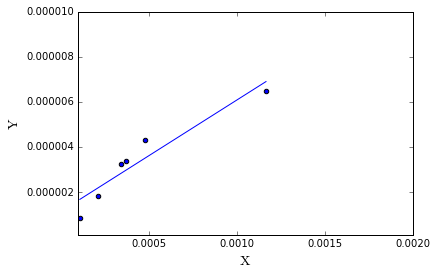

In [62]:
x=np.array(means)
y=np.array(var)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
yfit=x*slope+intercept

plt.xlim(0.0001, 0.002) 
plt.ylim(0.0000001, 0.00001)

plt.scatter(x, y)
plt.plot(x, yfit)
plt.xlabel(r'$\mathrm{X}$', fontsize=14)
plt.ylabel(r'$\mathrm{Y}$', fontsize=14)
plt.show()

In [55]:
#r value
r_value

0.94863710823867997

In [56]:
#p value
p_value

0.0038894685547082083

In [57]:
#slope
slope

0.0049461191204572463

In [58]:
#intercept
intercept

1.1270209695558862e-06

The r-value is 0.94863 which is very close to 1, which indicates a very strong linear relationship. The p-value is also very small, which indicates that the relationship is significant. Also, the intercept (1.1270e-6) is very small, so the line essentially goes through the origin, which is what we want. The only thing that is a bit odd is that the slope is 0.0049, which is not very close to the a's that were calculated earlier. Nevertheless, there is a linear relationship between the means and variances of the intensity data, so I conclude that the noise is due to the Poisson distribution of the discrete photons.